<a href="https://colab.research.google.com/github/pramodcgupta/Machine-Learning-Predictions/blob/master/Sales_Prediction_Using_Price_and_Promotion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/susanli2016/Machine-Learning-with-Python/master/data/Sales_Product_Price_by_Store.csv')
df.head()

,Store,Product,Date,Is_Holiday,Base Price,Price,Weekly_Units_Sold
0,1,1,2/5/2010,False,9.99,7.99,245
1,1,1,2/12/2010,True,9.99,7.99,453
2,1,1,2/19/2010,False,9.99,7.99,409
3,1,1,2/26/2010,False,9.99,7.99,191
4,1,1,3/5/2010,False,9.99,9.99,145


In [3]:
df['Date']=pd.to_datetime(df.Date)
df['WeeklySale']=df.Price*df.Weekly_Units_Sold
df.set_index('Date', inplace=True)
df['year'] = df.index.year
df['month'] = df.index.month
df['day'] = df.index.day
df['weekofyear'] = df.index.weekofyear

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  import sys


In [39]:
df.head()

,Store,Product,Is_Holiday,Base Price,Price,Weekly_Units_Sold,WeeklySale,year,month,day,weekofyear,Is_Promotion
Date,,,,,,,,,,,,
2010-02-05,1,1,False,9.99,7.99,245,1957.55,2010,2,5,5,1
2010-02-12,1,1,True,9.99,7.99,453,3619.47,2010,2,12,6,1
2010-02-19,1,1,False,9.99,7.99,409,3267.91,2010,2,19,7,1
2010-02-26,1,1,False,9.99,7.99,191,1526.09,2010,2,26,8,1
2010-03-05,1,1,False,9.99,9.99,145,1448.55,2010,3,5,9,0


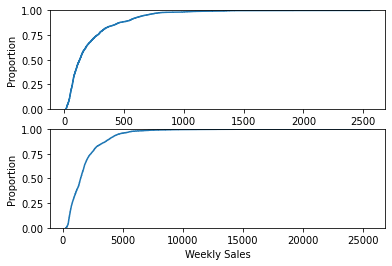

In [5]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(2,2)
plt.subplot(2,1,1)
sns.ecdfplot(df.Weekly_Units_Sold)
plt.xlabel('Weekly Units Sold')
plt.subplot(2,1,2)
sns.ecdfplot(df.WeeklySale)
plt.xlabel('Weekly Sales')
plt.show()

In [6]:
df.groupby(['Store'])['WeeklySale'].describe().sort_values(by='mean')

,count,mean,std,min,25%,50%,75%,max
Store,,,,,,,,
5,429.0,588.922984,242.628977,285.87,461.23,519.74,613.53,2264.97
3,429.0,670.924009,366.816321,229.77,459.77,619.69,730.78,2650.00
7,429.0,955.115058,489.084883,389.61,649.35,857.61,1041.51,3270.00
8,429.0,1352.094056,811.326288,516.53,846.23,1275.87,1491.51,6656.67
1,429.0,1789.414172,900.074226,769.65,1208.90,1659.17,1957.20,6816.59
6,429.0,2066.705082,1163.284768,890.19,1418.58,1758.40,2156.40,7936.03
2,429.0,2469.447413,1328.162884,1143.48,1579.21,2215.08,2756.55,9110.00
4,429.0,3078.462145,1746.147872,1099.45,1818.18,2626.61,3837.51,13753.12
10,429.0,4093.407249,3130.087191,1483.65,2462.88,3707.81,4510.47,25570.00


In [31]:
df.groupby(['Product'])['WeeklySale'].describe().sort_values(by='mean')

,count,mean,std,min,25%,50%,75%,max
Product,,,,,,,,
1,1287.0,1445.919153,1109.460675,229.77,626.43,1204.23,1821.260,9360.63
2,1287.0,2073.591896,1350.188483,401.33,844.59,1789.44,2855.735,6031.93
3,1287.0,2168.653007,2499.613670,285.87,921.56,1495.32,2476.440,25570.00


In [8]:
df.groupby(['Store'])['Weekly_Units_Sold'].sum().sort_values()

Store
5      27300
3      31689
7      44027
8      65273
1      86699
6      97698
2     121465
4     158718
10    200924
Name: Weekly_Units_Sold, dtype: int64

It is easy to see that Store 10 has the highest average weekly sales among all 9 stores, also Store 10 has the most total weekly units sold.
And Store 5 has the lowest average weekly sales.
Apparently, Store 10 is the most selling and crowded one.

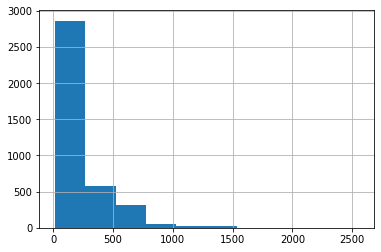

In [9]:
df.Weekly_Units_Sold.hist()

In [10]:
df[df.Weekly_Units_Sold <= 500].shape[0] / df.shape[0]

0.8857808857808858

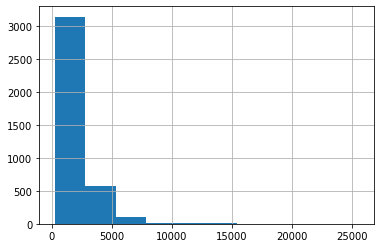

In [11]:
df.WeeklySale.hist()

In [12]:
df[df.WeeklySale <= 5000].shape[0] / df.shape[0]

0.958041958041958

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


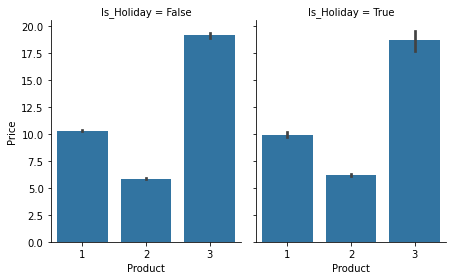

In [13]:
sns.FacetGrid(df, col="Is_Holiday", height = 4, aspect = 0.8).map(sns.barplot, "Product","Price")

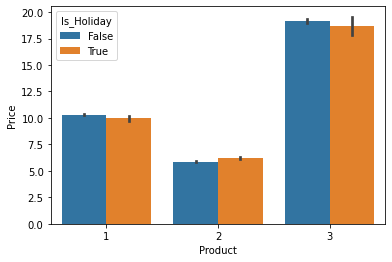

In [14]:
import numpy as np
sns.barplot(x="Product", y="Price", hue='Is_Holiday', estimator=np.mean, data=df)

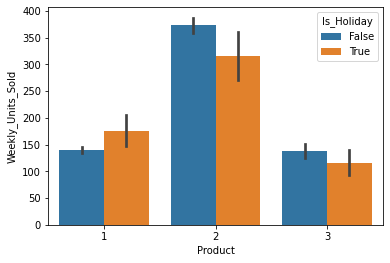

In [15]:
sns.barplot(x="Product", y="Weekly_Units_Sold", hue='Is_Holiday', data=df)

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


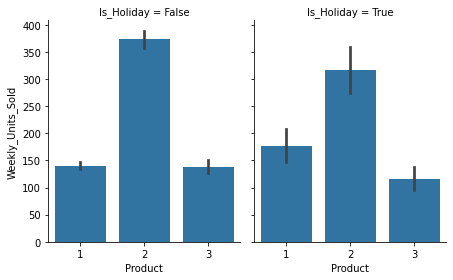

In [16]:
sns.FacetGrid(df, col="Is_Holiday", height=4, aspect=.8).map(sns.barplot, "Product","Weekly_Units_Sold")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


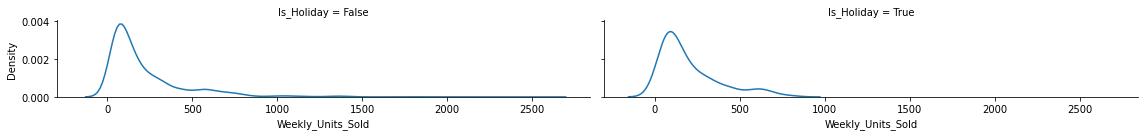

In [17]:
sns.FacetGrid(df, col="Is_Holiday", height=2, aspect=4).map(sns.distplot, 'Weekly_Units_Sold', hist=False)

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


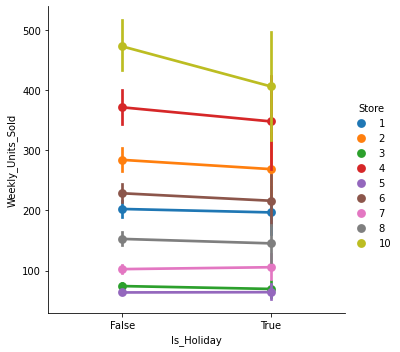

In [18]:
sns.factorplot(data=df, x='Is_Holiday', y='Weekly_Units_Sold', hue='Store')

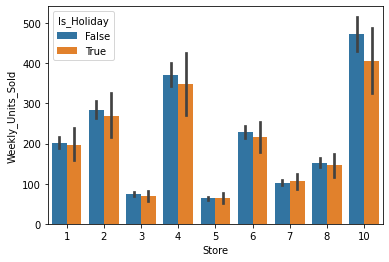

In [19]:
sns.barplot(x='Store', y='Weekly_Units_Sold', data=df, hue='Is_Holiday')

In [20]:
df.groupby(['Store','Is_Holiday'])['Weekly_Units_Sold'].mean()

Store  Is_Holiday
1      False         202.496241
       True          196.766667
2      False         284.213033
       True          268.800000
3      False          74.200501
       True           69.433333
4      False         371.611529
       True          348.166667
5      False          63.604010
       True           64.066667
6      False         228.604010
       True          216.166667
7      False         102.406015
       True          105.566667
8      False         152.669173
       True          145.266667
10     False         473.015038
       True          406.366667
Name: Weekly_Units_Sold, dtype: float64

In [21]:
pd.crosstab(df.Store, df.Is_Holiday, values=df.Weekly_Units_Sold, aggfunc='mean')

Is_Holiday,False,True
Store,,
1,202.496241,196.766667
2,284.213033,268.800000
3,74.200501,69.433333
4,371.611529,348.166667
5,63.604010,64.066667
6,228.604010,216.166667
7,102.406015,105.566667
8,152.669173,145.266667
10,473.015038,406.366667


/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


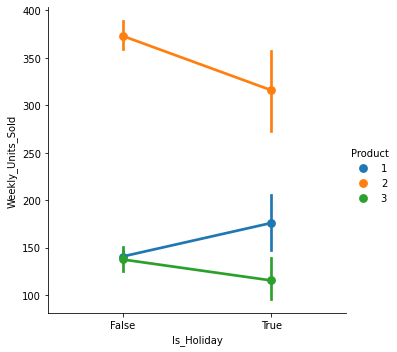

In [22]:
sns.factorplot(data=df, x='Is_Holiday', y='Weekly_Units_Sold', hue='Product')

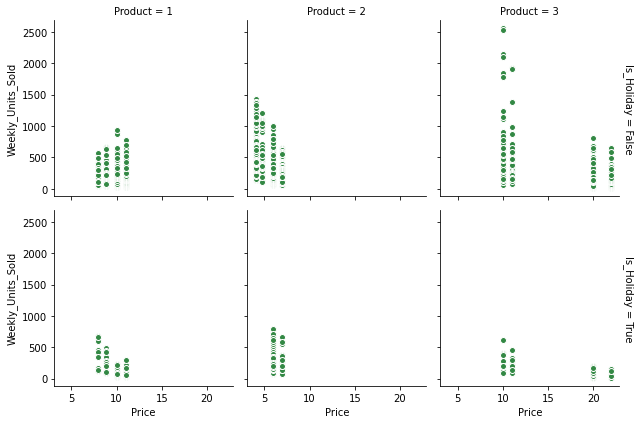

In [30]:
g=sns.FacetGrid(df, col="Product", row="Is_Holiday", margin_titles=True)
g.map(plt.scatter, "Price","Weekly_Units_Sold", color="#338844", edgecolor="white")

In [38]:
df['Is_Promotion'] = np.where(df.Price - df['Base Price'] < 0, 1, 0)

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


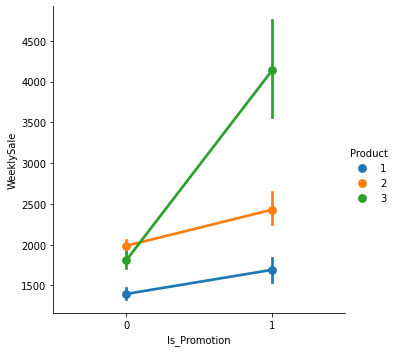

In [44]:
sns.factorplot(data=df, x="Is_Promotion", y='WeeklySale', hue="Product")

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


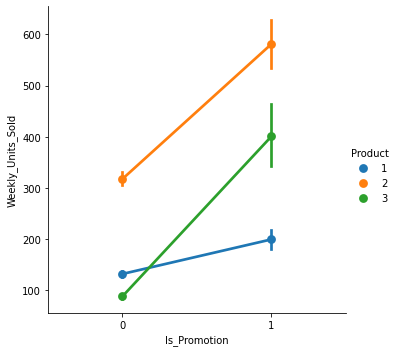

In [45]:
sns.factorplot(data=df, x="Is_Promotion", y='Weekly_Units_Sold', hue="Product")

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


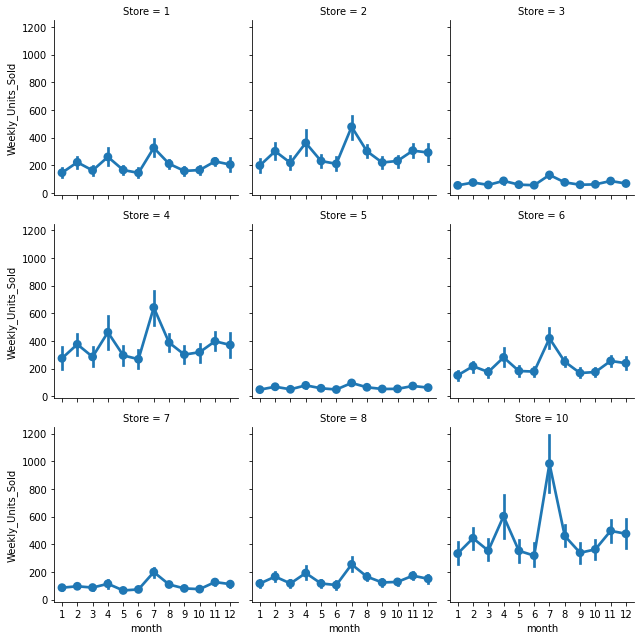

In [47]:
g=sns.FacetGrid(df, col="Store", col_wrap=3)
g.map(sns.pointplot, "month", "Weekly_Units_Sold")

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


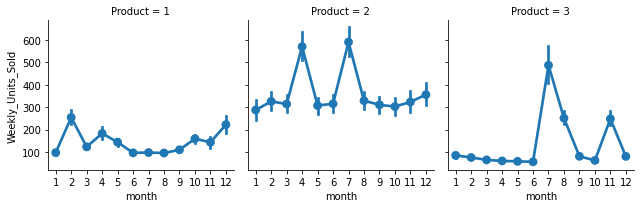

In [48]:
g=sns.FacetGrid(df, col="Product", col_wrap=3)
g.map(sns.pointplot, "month", "Weekly_Units_Sold")

Every product has somewhat seasonality, product 2 has two peak seasons per year and product 3 has one.

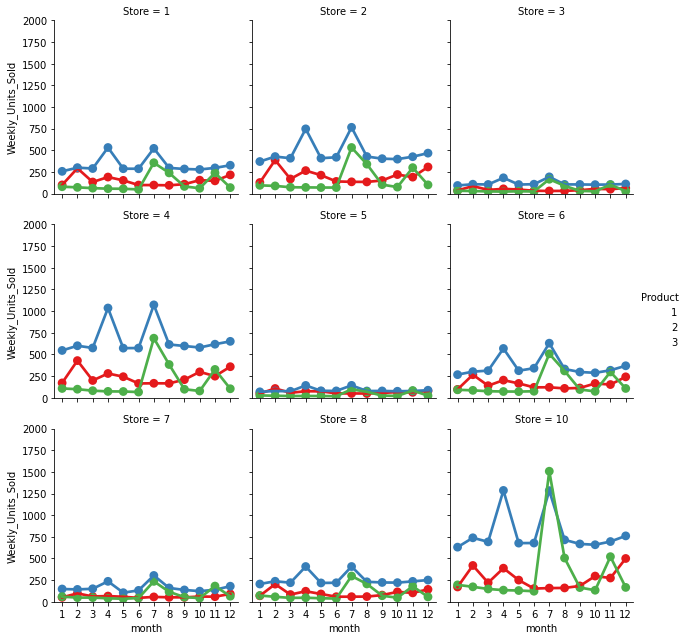

In [49]:
g = sns.FacetGrid(df, col="Store", col_wrap=3, height=3, ylim=(0, 2000), hue='Product', palette="Set1")
g.map(sns.pointplot, "month", "Weekly_Units_Sold", ci=None, order = [1,2,3,4,5,6,7,8,9,10,11,12], alpha=.7)
g.add_legend();

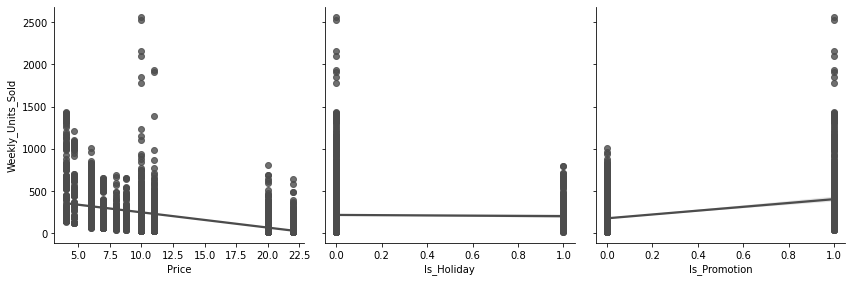

In [53]:
g = sns.PairGrid(df, y_vars=["Weekly_Units_Sold"], x_vars=["Price", "Is_Holiday","Is_Promotion"], height=4)
g.map(sns.regplot, color=".3");